# Pymaceuticals Inc.
---

### Analysis

- .
 

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = merged_df.groupby("Mouse ID")["Timepoint"].nunique()
duplicates_df

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset="Mouse ID", keep= "last")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = merged_df.groupby("Drug Regimen")
mean_tumor_volume = drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_regimen["Tumor Volume (mm3)"].var()
sdv_tumor_volume = drug_regimen["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
"Mean Tumor Volume": mean_tumor_volume,
"Median Tumor Volume": median_tumor_volume,
"Tumor Volume Variance": variance_tumor_volume,
"Tumor Volume Std.Dev.": sdv_tumor_volume,
"Tumor Volume Std. Err.": sem_tumor_volume
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregation_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

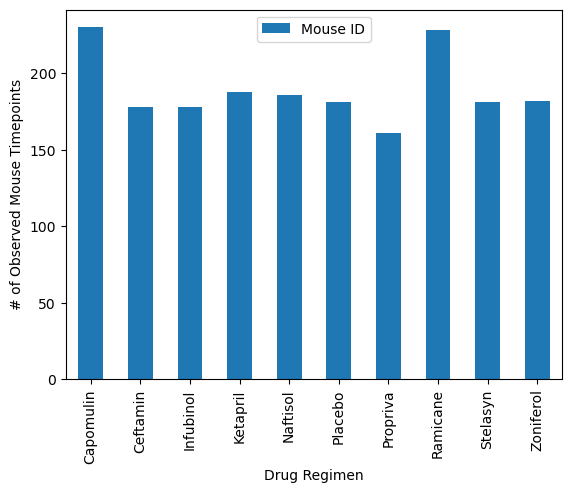

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = pd.DataFrame(drug_regimen["Mouse ID"].count())
#mice_per_drug
mice_per_drug.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


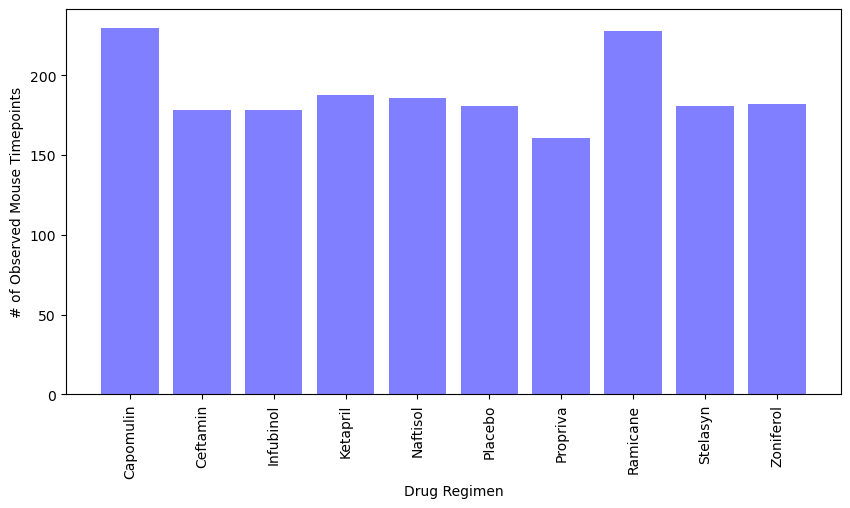

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mice_per_drug))
regimen_index = mice_per_drug.index.values
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_per_drug["Mouse ID"], color = "b", alpha=0.5, align= "center")
plt.xticks(tick_locations, regimen_index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


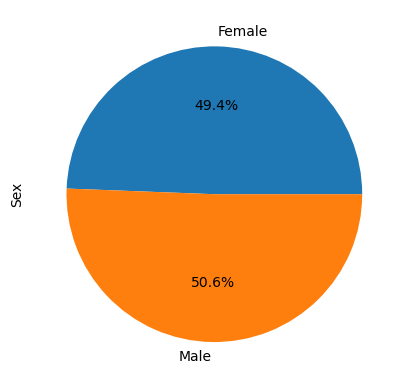

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = merged_df.groupby("Sex")["Sex"].count()
#unsure why we would use the merged df over the cleaned df; however, result aligns with using merged df so thats what I went with
#sex_df
sex_df.plot(kind="pie", y= "Sex", autopct ="%1.1f%%")
plt.show()

Text(0, 0.5, 'Sex')

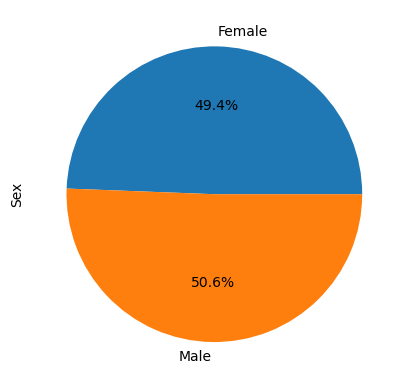

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, labels = ["Female", "Male"], autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_final = clean_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint","Tumor Volume (mm3)"]]

timepoint_final = timepoint_final.reset_index()
#timepoint_final
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
244,Zoniferol,q633,45,70.827796
245,Zoniferol,s337,45,62.109651
246,Zoniferol,w140,5,47.717952
247,Zoniferol,w575,45,68.401286


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = timepoint_final.loc[timepoint_final["Drug Regimen"] == drug, "Tumor Volume (mm3)"] #
    
    # add subset 
    tumor_vol_data.append(tumor)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq - (1.5*iqr)
    #Outliers = tumor < lowerbound or tumor > upperbound 
tumor_vol_data

[0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 175    38.407618
 176    43.047543
 177    38.810366
 178    32.978522
 179    38.342008
 180    33.397653
 181    37.311236
 182    40.659006
 183    29.128472
 184    33.562402
 185    36.374510
 186    31.560470
 187    36.134852
 188    22.050126
 189    30.564625
 190    31.095335
 191    45.220869
 192    36.561652
 193    37.225650
 194    43.419381
 195    30.276232
 196    40.667713
 197    43.166373
 198    44.183451
 199    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 50    67.973419
 51    65.525743
 52  

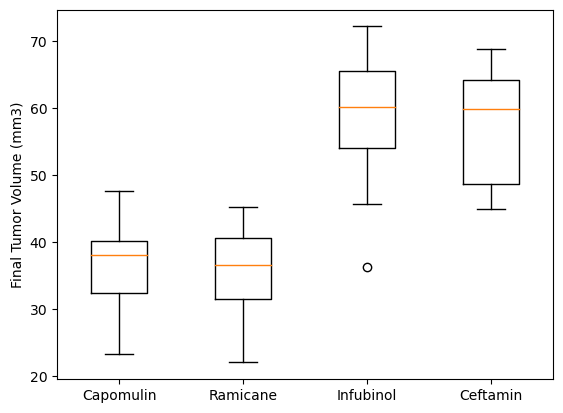

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line and Scatter Plots

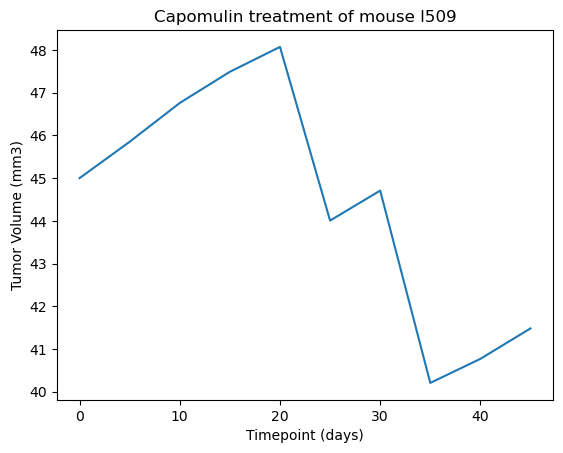

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


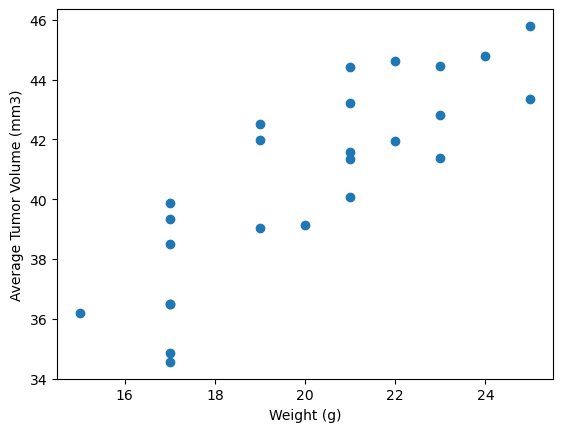

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


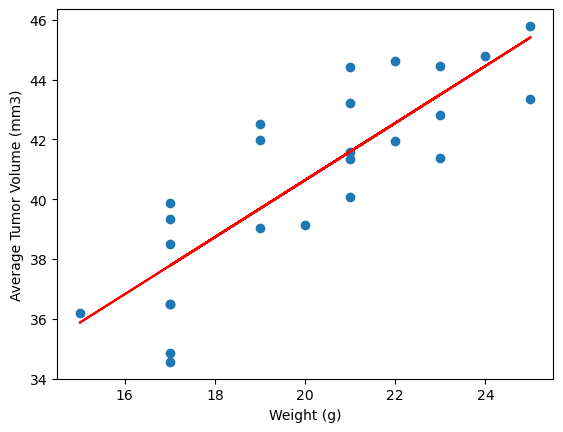

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
